<a href="https://colab.research.google.com/github/BrenoSilvaProgramador/Pyhton_Aprendizado/blob/main/Arvore_de_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arvore de decisão

In [10]:
import pandas as pd
import graphviz
import pydot

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

dicionario = [{'Curado' : False, 'Cloroquina' : 'sim'},  #Criando um dicionario 
              {'Curado' : True,  'Cloroquina' : 'sim'},
              {'Curado' : False, 'Cloroquina':  'sim'},
              {'Curado' : False, 'Cloroquina' : 'nao'},
              {'Curado' : True,  'Cloroquina' : 'nao'},
              {'Curado' : False, 'Cloroquina' : 'nao'},
              {'Curado' : False, 'Cloroquina' : 'nao'},
              {'Curado' : False, 'Cloroquina' : 'nao'}]

# Transformando o dicionario em um dataframe

data = pd.DataFrame(dicionario)
data

,Curado,Cloroquina
0,False,sim
1,True,sim
2,False,sim
3,False,nao
4,True,nao
5,False,nao
6,False,nao
7,False,nao


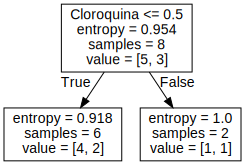

In [22]:
# Preparando os dados para o treino:

x_train = [ [1] if a else [0] for a in data['Curado']]          #transformando bool em int
y_train = [ 1 if d == 'sim' else 0 for d in data['Cloroquina']] #transformando string em int
label = ['Cloroquina']

modelo = DecisionTreeClassifier(max_depth = None, 
                                max_features= None, 
                                criterion ='entropy', 
                                min_samples_leaf= 1, 
                                min_samples_split= 2) 
# personalizo o modelo para o desenvolvimento da arvore inserindo os chamados HiperParametros

modelo.fit(x_train, y_train) #pasando os dados para o classificador

#definindo o nome do arquivo com a arvore de decisao
arquivo = '/content/sample_data/arquivo.dot'

#Gerando o gráfico da árvore de decisão
export_graphviz(modelo, out_file = arquivo, feature_names = label)
with open(arquivo) as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)